# Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score,accuracy_score
from sklearn.ensemble import RandomForestRegressor

# Importing Data

In [2]:
df = pd.read_csv(r'Source/Crop Production data.csv')

In [3]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [4]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


# Performing ETL

In [5]:
df.shape

(246091, 7)

In [6]:
df.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [7]:
df.dropna(inplace=True)
df['Production'].isna().sum()

0

In [8]:
df.duplicated().sum()

0

In [9]:
df.rename(columns={'State_Name':'state', 'District_Name':'district', 'Crop_Year':'year', 'Season':'season', 'Crop':'crop', 'Area':'area', 'Production':'production'}, inplace=True)

In [10]:
df = df[df['year']!=2015]
df['crop'] = df['crop'].str.strip()
df['year'] = df['year'].astype(str)
df['season'] = df['season'].str.strip()

In [11]:
pd.options.display.float_format = '{:.1f}'.format

# EDA & Visualization

### Looking for trends in crop production throughout the years

###### How was production throughout the years

In [12]:
# Crop production in general is measured in weight and not quantity

In [13]:
year_produce = df[['year','production']].pivot_table(index='year', values='production', aggfunc='sum').reset_index()
year_produce['production'] = year_produce['production'].round(0)
year_produce

,year,production
0,1997,851232906.0
1,1998,5825320640.0
2,1999,6434665985.0
3,2000,7449709127.0
4,2001,7465540840.0
5,2002,7696955163.0
6,2003,7917973505.0
7,2004,8189461695.0
8,2005,8043757330.0
9,2006,8681913124.0


Text(0, 0.5, 'Production')

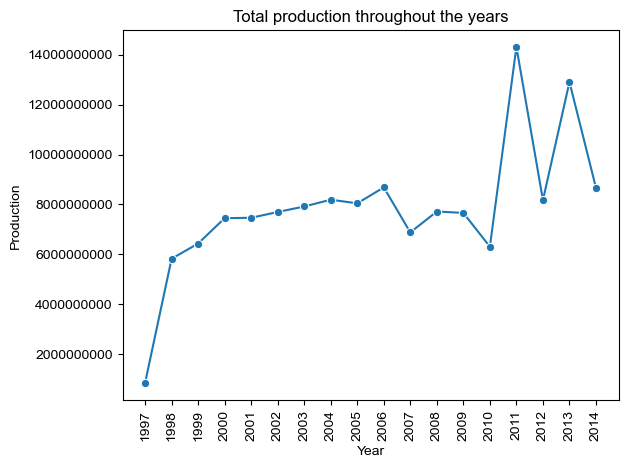

In [14]:
sns.lineplot(x='year', y='production',marker="o" , data=year_produce)
sns.set(rc={'axes.facecolor': 'lightgrey', 'figure.facecolor': 'lightblue'})
plt.title('Total production throughout the years')
plt.xticks(rotation='vertical')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Year')
plt.ylabel('Production')

In [15]:
# Crop production in general has increased over the years, hitting the highest in 2011 and 2013 respectively

###### How much has the area of cultivation changed throughout these years?

In [16]:
year_area = df[['year','area']].pivot_table(index='year', values='area', aggfunc='sum').reset_index()
year_area['year'] = year_area['year'].astype(str)
year_area['area'] = year_area['area'].round(0)
year_area

,year,area
0,1997,231715046.0
1,1998,166631554.0
2,1999,158612474.0
3,2000,165289840.0
4,2001,165292713.0
5,2002,157328631.0
6,2003,169765518.0
7,2004,167756610.0
8,2005,162920318.0
9,2006,170588793.0


Text(0, 0.5, 'Area')

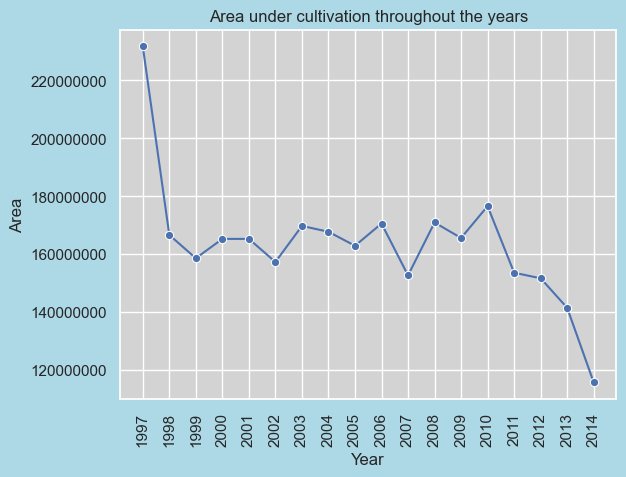

In [17]:
sns.lineplot(x='year', y='area',marker="o" , data=year_area)
plt.title('Area under cultivation throughout the years')
plt.xticks(rotation='vertical')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Year')
plt.ylabel('Area')

In [18]:
# Area of cultivation has decreased over years

In [19]:
# Even though area is reduced but the production has increased.
# lets explore the reasons that made this possible.

###### Let's see which crops were the most produced.

In [20]:
top_crop = df[['crop','production']].pivot_table(index='crop', values='production', aggfunc='sum').reset_index()
top_crop['production'] = top_crop['production'].round(0)
top_crop.sort_values(by='production', inplace=True, ascending=False)
top_crop.head(5)

,crop,production
28,Coconut,129981629216.0
106,Sugarcane,5535104369.0
95,Rice,1599576696.0
119,Wheat,1332824816.0
87,Potato,424769110.0


In [21]:
# Coconut production by weight was highest.

###### Visualizing production to area ratio of these crops

In [22]:
top_5 = ['Coconut', 'Total foodgrain', 'Wheat', 'Jute']
ratio = df[df['crop'].isin(top_5)][['crop', 'area', 'production']]
ratio['ratio'] = ratio['production']/ratio['area']
ratio['ratio'] = ratio['ratio'].round(0)
ratio

,crop,area,production,ratio
5,Coconut,18168.0,65100000.0,3583.0
14,Coconut,18190.0,64430000.0,3542.0
23,Coconut,18240.0,67490000.0,3700.0
32,Coconut,18284.7,68580000.0,3751.0
41,Coconut,18394.7,52380000.0,2848.0
...,...,...,...,...
245980,Wheat,1880.0,4206.0,2.0
246012,Wheat,1648.0,3310.0,2.0
246027,Jute,11.0,215.0,20.0
246047,Wheat,1187.0,2675.0,2.0


Text(0, 0.5, 'Ratio (Production/Area)')

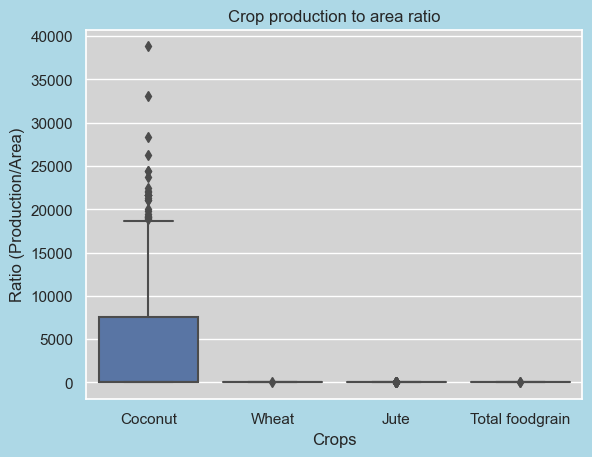

In [23]:
sns.boxplot(x='crop', y='ratio', data=ratio)
plt.title('Crop production to area ratio')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Crops')
plt.ylabel('Ratio (Production/Area)')

In [24]:
# It's pretty evident that by weight more coconuts are cultivated in a given area.
# Basically, there is more production in a smaller area when cocnuts are cultivated.

###### Visualizing the production of coconut through the years

In [25]:
year_nut = df[df['crop']=='Coconut'][['year','production']].pivot_table(index='year', values='production', aggfunc='sum')
year_nut = year_nut.reset_index()
year_nut

,year,production
0,1997,6344142.0
1,1998,5283860454.4
2,1999,5859817269.7
3,2000,6880408907.8
4,2001,6881286541.8
5,2002,7150889366.5
6,2003,7355742937.4
7,2004,7663983741.7
8,2005,7453185484.0
9,2006,8092567153.0


Text(0, 0.5, 'Production')

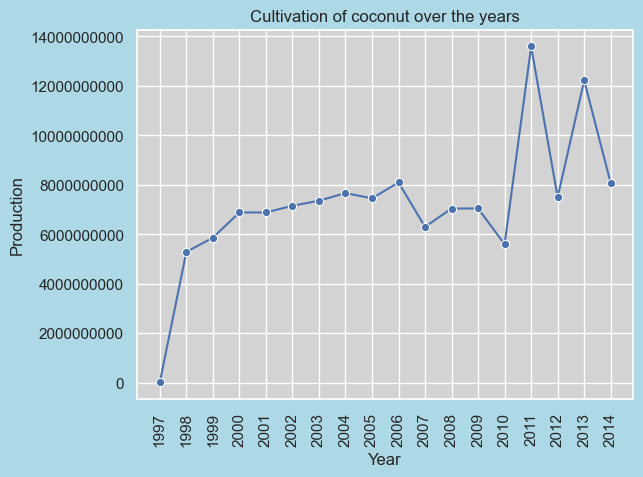

In [26]:
sns.lineplot(x='year', y='production', marker='o', data=year_nut)
sns.set(rc={'axes.facecolor': 'lightgrey', 'figure.facecolor': 'lightblue'})
plt.title('Cultivation of coconut over the years')
plt.xticks(rotation='vertical')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Year')
plt.ylabel('Production')

In [27]:
# Increasing production of crops like coconut, which are heavy and contribute more weight, has led to an increase in overall crop production by weight even though the area of cultivation has decreased.

### Exploring cultivation in states

###### Total area under cultivation by states

Text(0, 0.5, 'Area')

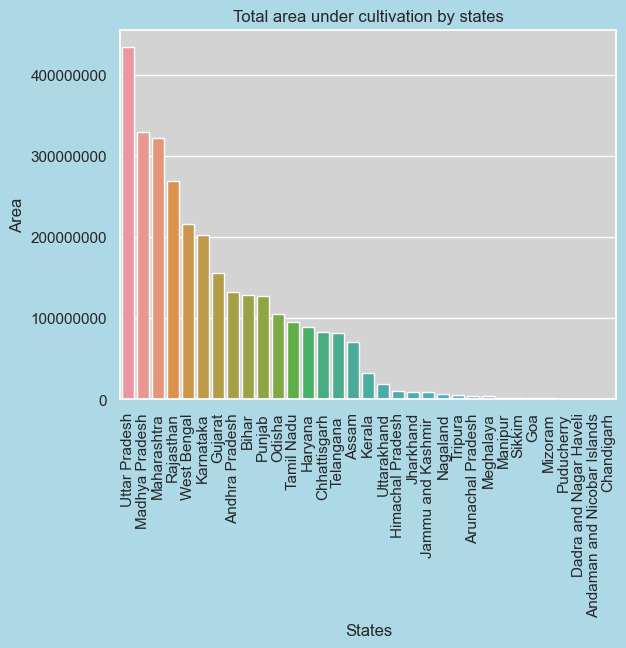

In [28]:
area_states = df[['state','area']].pivot_table(index='state', values='area', aggfunc='sum').reset_index().sort_values(by='area', ascending=False)
sns.barplot(x='state', y='area', data=area_states)
sns.set(rc={'axes.facecolor': 'lightgrey', 'figure.facecolor': 'lightblue'})
plt.title('Total area under cultivation by states')
plt.xticks(rotation='vertical')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('States')
plt.ylabel('Area')

In [29]:
# Uttar pradesh has the largest area under cultivation

###### Top 5 crops cultivated in Uttar Pradesh

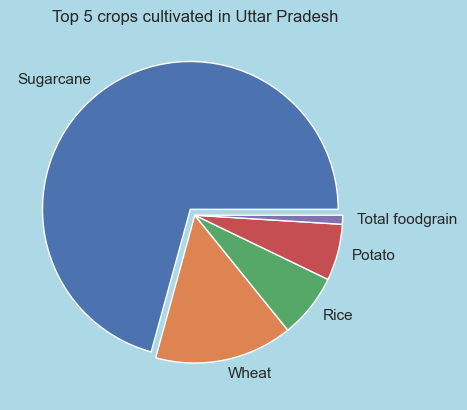

In [30]:
Punjab_crops = df[df['state']=='Uttar Pradesh'][['crop','production']]
Punjab_crops = Punjab_crops.pivot_table(index='crop', values='production', aggfunc='sum').reset_index().sort_values(by='production', ascending=False).head(5)
plt.pie(Punjab_crops['production'], labels=Punjab_crops['crop'], explode=[0.05,0,0,0,0])
sns.set(rc={'axes.facecolor': 'lightgrey', 'figure.facecolor': 'lightblue'})
plt.title('Top 5 crops cultivated in Uttar Pradesh')
plt.ticklabel_format(style='plain', axis='y')

###### Total production by states

Text(0, 0.5, 'Production')

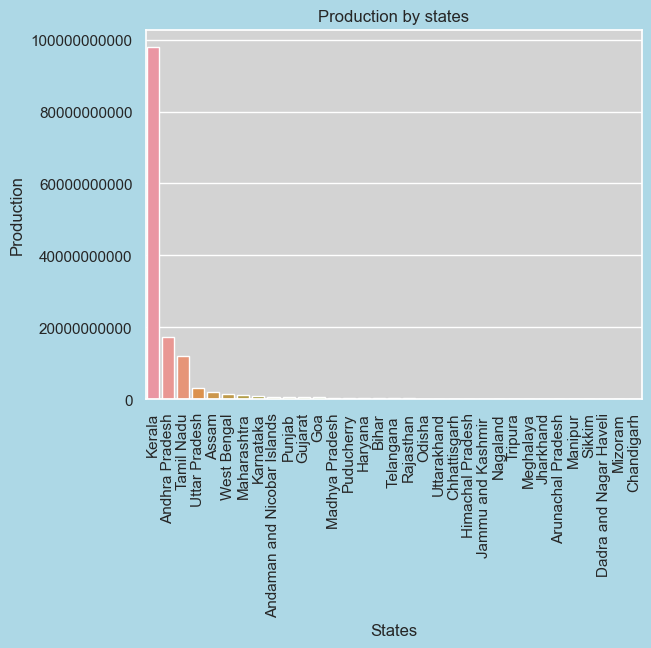

In [31]:
prod_states = df[['state','production']].pivot_table(index='state', values='production', aggfunc='sum').reset_index().sort_values(by='production', ascending=False)
sns.barplot(x='state', y='production', data=prod_states)
sns.set(rc={'axes.facecolor': 'lightgrey', 'figure.facecolor': 'lightblue'})
plt.title('Production by states')
plt.xticks(rotation='vertical')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('States')
plt.ylabel('Production')

In [32]:
# Production in kerala is much more than any other other relevant state

###### Top 5 crops cultivated in Kerala

In [33]:
Kerala_crops = df[(df['state']=='Kerala')][['crop','production']]
Kerala_crops = Kerala_crops.pivot_table(index='crop', values='production', aggfunc='sum').reset_index().sort_values(by='production', ascending=False)
def color_red_green(value):
    return 'background-color: yellow' if value>np.mean(Punjab_crops['production']) else 'background-color: red'
Kerala_crops.set_index('crop', inplace=True)
Kerala_crops.head(5).style.applymap(color_red_green)

,production
crop,
Coconut,97803036000.000000
Tapioca,46113659.300000
Rice,10593347.580000
Banana,7655661.990000
Sugarcane,3819915.840000


In [34]:
# Coconut is the most produced by weight in kerala.
# This explains why it has the highest production even the the area under cultivation is low.
# Since coconut has very high production to area (under cultivation) ratio.

###### Relation between area under cultivation  and coconut production

Text(0, 0.5, 'Production')

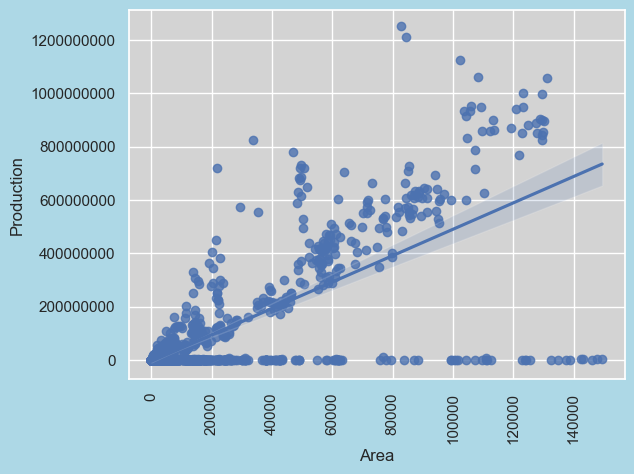

In [35]:
area_states = df[df['crop']=='Coconut'][['area','production']]
sns.regplot(x='area', y='production', data=area_states)
sns.set(rc={'axes.facecolor': 'lightgrey', 'figure.facecolor': 'lightblue'})
plt.title('')
plt.xticks(rotation='vertical')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Area')
plt.ylabel('Production')

###### Coconut production by states through the years

Text(47.249999999999986, 0.5, 'State')

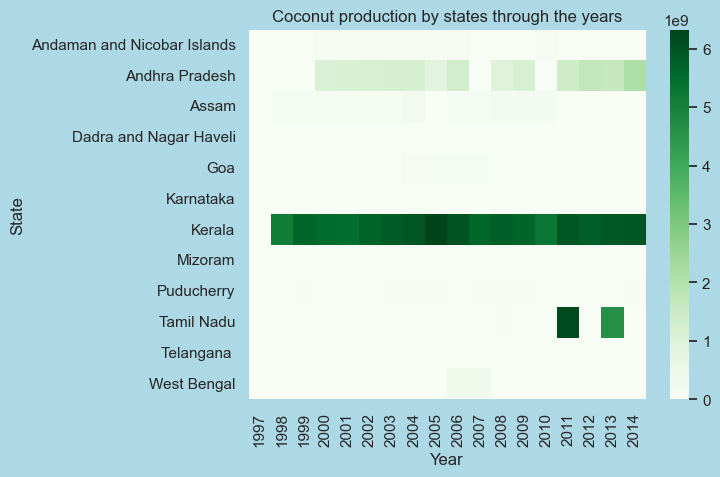

In [36]:
state_year = df[df['crop']=='Coconut'][['state','year','production']]
state_year = state_year.pivot_table(index='state', columns='year', values='production', aggfunc='sum').fillna(0).round(0)
sns.set(rc={'axes.facecolor': 'white', 'figure.facecolor': 'lightblue'})
sns.heatmap(state_year, cmap='Greens')
plt.title('Coconut production by states through the years')
plt.xlabel('Year')
plt.ylabel('State')

In [37]:
# Its clearly visible that Kerala has constant production of coconut through the years.
# Followed by Andhra Pradesh and Tamil Nadu.
# This confirms the idea that coconut cultivation leads to more production in a smaller area compared to other crops.

###### Top 5 crops That are produced in most states.

Text(0, 0.5, 'Number of states')

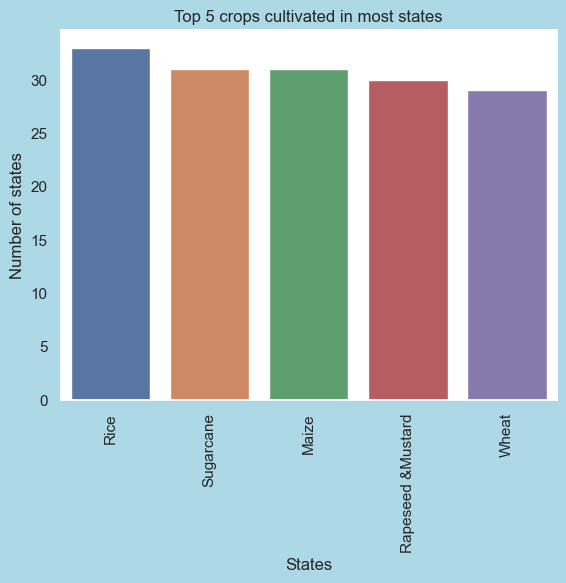

In [38]:
crop_count = df[['crop','state']].pivot_table(index='crop', values='state', aggfunc='nunique').reset_index().sort_values(by='state', ascending=False).head(5)
sns.barplot(x='crop', y='state', data=crop_count)
sns.set(rc={'axes.facecolor': 'lightgrey', 'figure.facecolor': 'lightblue'})
plt.title('Top 5 crops cultivated in most states')
plt.xticks(rotation='vertical')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('States')
plt.ylabel('Number of states')

Text(0, 0.5, 'Production')

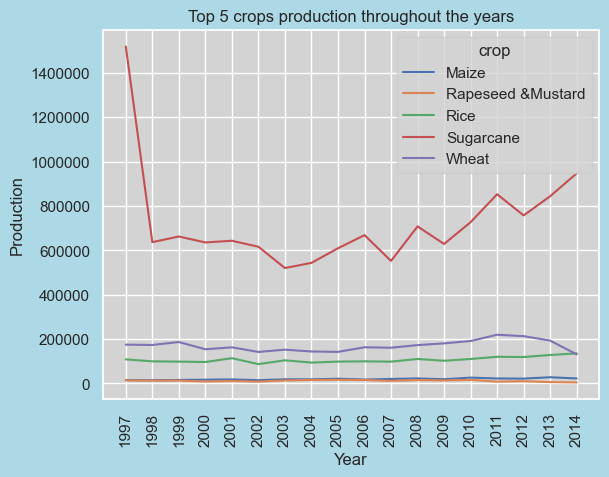

In [39]:
crop_year = df[df['crop'].isin(crop_count['crop'])][['year','crop','production']].pivot_table(index=['year','crop'], values='production', aggfunc='mean').reset_index()
sns.lineplot(x='year', y='production', hue='crop', data=crop_year)
sns.set(rc={'axes.facecolor': 'lightgrey', 'figure.facecolor': 'lightblue'})
plt.title('Top 5 crops production throughout the years')
plt.xticks(rotation='vertical')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Year')
plt.ylabel('Production')

In [40]:
# Even though rice is cultivated in most states, sugarcane has had more consistent production through the years.

###### Crop production through the seasons.

Text(29.749999999999993, 0.5, 'Crops')

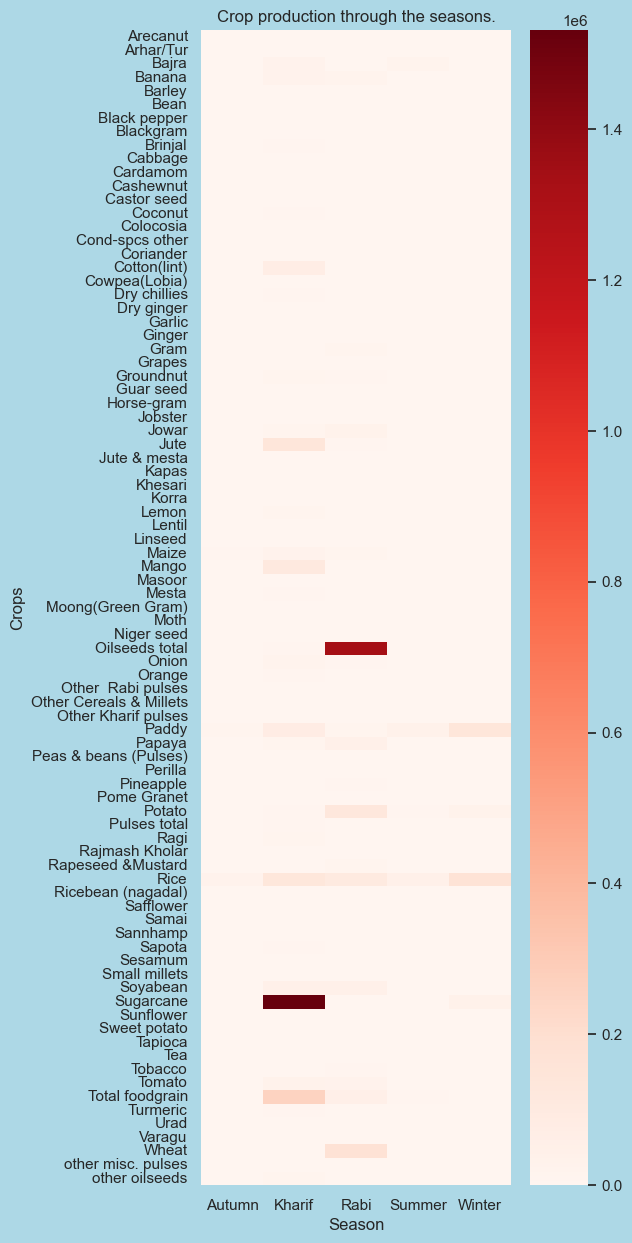

In [41]:
plt.figure(figsize=[5,15])
crop_season = df[df['season']!='Whole Year'][['crop','production','season']].pivot_table(index='crop', columns='season', values='production', aggfunc='mean').fillna(0).round(0)
sns.heatmap(crop_season, xticklabels=1, yticklabels=1, cmap='Reds')
plt.title('Crop production through the seasons.')
plt.xlabel('Season')
plt.ylabel('Crops')

In [42]:
# Crops like paddy, rice, and potatoes show consistent cultivation over the seasons
# Crops like sugarcane and oilseeds are seasonal.
# Also most crops are grown 

###### Average production of seasonal crops throughout the years.

Text(0, 0.5, 'Production')

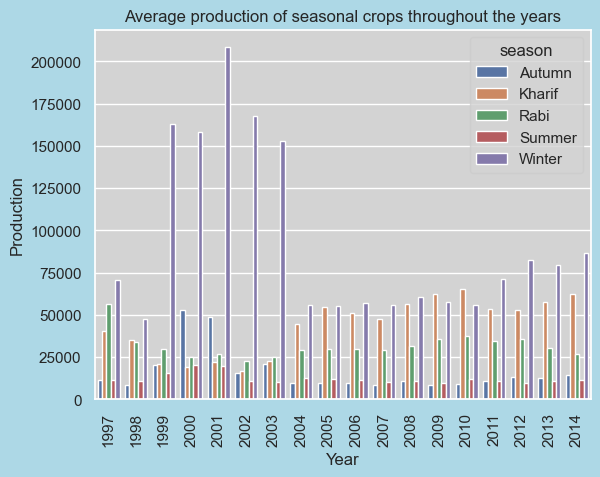

In [43]:
year_season = df[df['season']!='Whole Year'][['year','production','season']].pivot_table(index=['year', 'season'], values='production', aggfunc='mean').reset_index()
sns.barplot(x='year', y='production', hue='season', data=year_season)
sns.set(rc={'axes.facecolor': 'lightgrey', 'figure.facecolor': 'lightblue'})
plt.title('Average production of seasonal crops throughout the years')
plt.xticks(rotation='vertical')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Year')
plt.ylabel('Production')

In [44]:
# In general crops cultivated in winter have more consistent production that has increased with time

###### Relation between different attributes.

In [45]:
df_new = df.copy()

In [46]:
category_col =['state','district','crop','season']  
labelEncoder = preprocessing.LabelEncoder() 
mapping_dict ={} 
for col in category_col: 
    df_new[col] = labelEncoder.fit_transform(df_new[col]) 
  
    le_name_mapping = dict(zip(labelEncoder.classes_, 
                        labelEncoder.transform(labelEncoder.classes_))) 
    mapping_dict[col]= le_name_mapping 

Text(0.5, 1.0, 'Correlation between attributes')

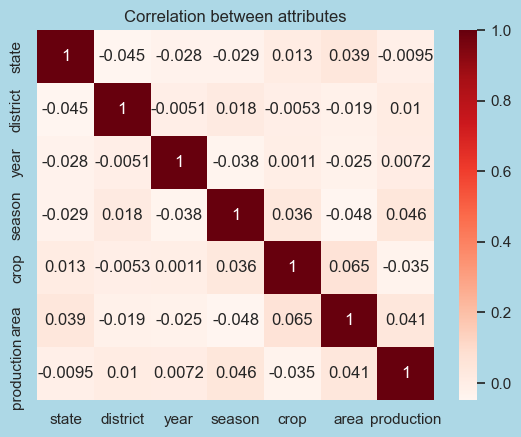

In [47]:
sns.heatmap(df_new.corr(),cmap='Reds',annot=True)
plt.title('Correlation between attributes')

In [48]:
# Out of all the attributes, there is some relation between the type of crop and the area under cultivation.

###### Significant attributes that contribute to production.

In [49]:
X = df_new.drop('production',axis=1)
Y = df_new['production']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
model = RandomForestRegressor(n_estimators=20, max_depth=10, criterion='friedman_mse')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_score(y_test,y_pred)

0.9188855507536897

In [50]:
feature_importance_df = pd.DataFrame(x_train.columns, columns=["Feature"])
feature_importance_df["Importance"] = model.feature_importances_
feature_importance_df.sort_values('Importance', ascending=False, inplace=True)
feature_importance_df

,Feature,Importance
4,crop,0.6
0,state,0.1
5,area,0.1
2,year,0.1
1,district,0.1
3,season,0.0


Text(0.5, 1.0, 'Significant attributes that contribute to production.')

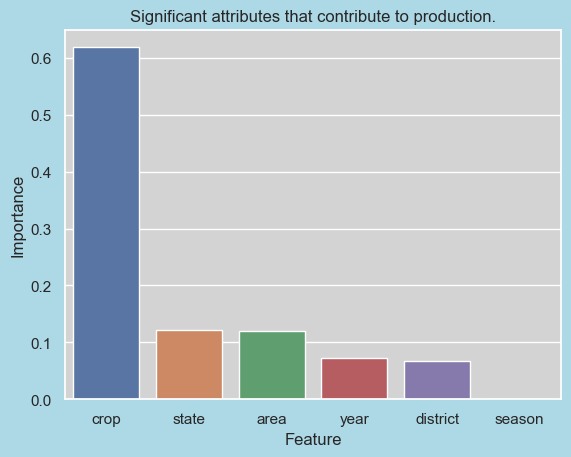

In [51]:
sns.barplot(x='Feature',y='Importance',data=feature_importance_df)
plt.title('Significant attributes that contribute to production.')

In [52]:
# The crop type is the most significant attribute in production.